## PRE- 써야하는 프로그램(??) 가져오기


In [0]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


## 데이터 가져오기

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## 데이터 살펴보기

In [0]:
len(x_train)

60000

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
x_test.shape

(10000, 28, 28)

## 데이터 shape 맞추기

In [0]:
x_train = x_train.reshape(60000, 28*28).astype('float32')/255.0
x_test = x_test.reshape(10000, 28*28).astype('float32')/255.0

## 훈련set/검증 set분리하기

In [0]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

## 데이터 전처리/one-hot encoding

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)

## 모델구성하기

In [0]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

## 모델 학습과정 설정하기

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

## 모델 학습시키기

In [0]:
hist = model.fit(x_train, y_train, epochs = 64, batch_size = 32, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/64
50000/50000 [==============================] - 3s 62us/step - loss: 0.8021 - acc: 0.7641 - val_loss: 0.3353 - val_acc: 0.9054
Epoch 2/64
50000/50000 [==============================] - 3s 50us/step - loss: 0.3055 - acc: 0.9111 - val_loss: 0.2448 - val_acc: 0.9316
Epoch 3/64
50000/50000 [==============================] - 3s 50us/step - loss: 0.2451 - acc: 0.9286 - val_loss: 0.2077 - val_acc: 0.9413
Epoch 4/64
50000/50000 [==============================] - 2s 50us/step - loss: 0.2089 - acc: 0.9389 - val_loss: 0.1856 - val_acc: 0.9483
Epoch 5/64
50000/50000 [==============================] - 3s 50us/step - loss: 0.1824 - acc: 0.9461 - val_loss: 0.1723 - val_acc: 0.9502
Epoch 6/64
50000/50000 [==============================] - 3s 50us/step - loss: 0.1623 - acc: 0.9523 - val_loss: 0.1481 - val_acc: 0.9581
Epoch 7/64
50000/50000 [=========

## 모델 평가하기

In [0]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size =32)
print('##EVALUATION LOSS AND METRICS')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 23us/step
##EVALUATION LOSS AND METRICS
[0.11978928293123027, 0.9741]


## 모델사용하기

In [0]:
yhat_test = model.predict(x_test, batch_size = 32)

## EXTRAS

In [0]:
import matplotlib.pyplot as plt

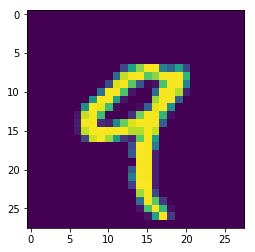

In [0]:
plt.figure()
plt.imshow(x_train[4].reshape(28,28))
plt.show()

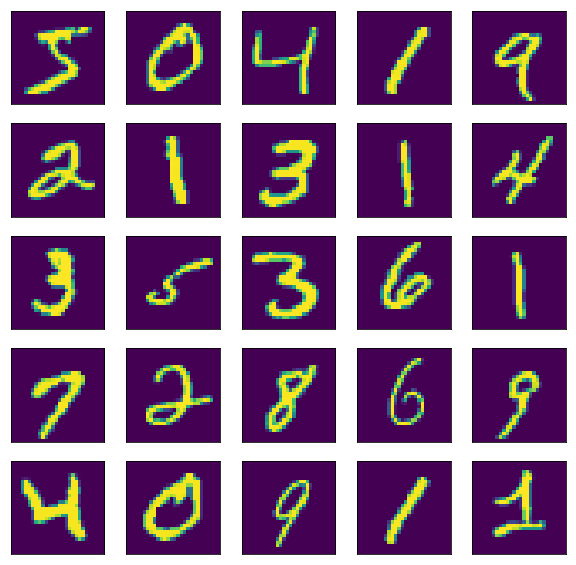

In [0]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i].reshape(28,28))
  
plt.show()